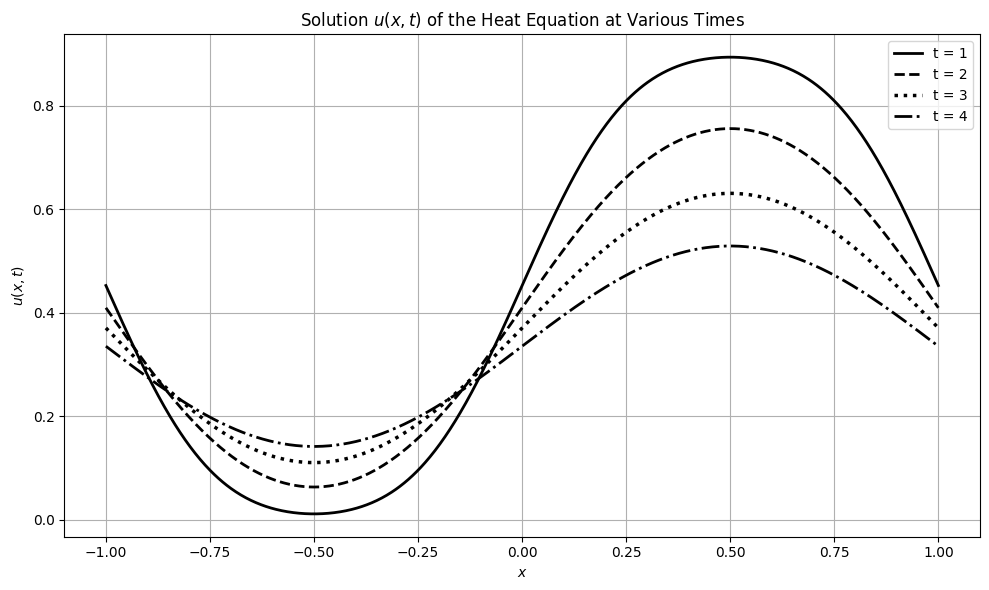

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
kappa = 0.02
beta = 0.1
L = 1
num_modes = 20  # Number of positive modes
n_values = np.arange(-num_modes, num_modes + 1)  # From -20 to 20

# Spatial domain
x = np.linspace(-L, L, 1000)

# Times to plot
times = [1, 2, 3, 4]

# Define line styles for different times
line_styles = [
    {'linestyle': '-', 'linewidth': 2},      # solid
    {'linestyle': '--', 'linewidth': 2},     # dashed
    {'linestyle': ':', 'linewidth': 2.5},    # dotted
    {'linestyle': '-.', 'linewidth': 2},     # dash-dot
]

# Initialize the solution
u = np.zeros_like(x, dtype=np.complex128)

# Precompute constants
pi = np.pi

# Compute coefficients c_n(0)
c_n0 = np.zeros(len(n_values), dtype=np.complex128)
for idx, n in enumerate(n_values):
    if n == 0:
        c_n0[idx] = 0.5  # c0(0) = 1/2
    elif n % 2 != 0:
        c_n0[idx] = (np.power(-1.0, n) - 1) / (2j * n * pi)  # Fixed power
    else:
        c_n0[idx] = 0.0  # c_n(0) = 0 for even n

# Function to compute u(x, t)
def compute_u(x, t, c_n0, n_values, kappa, beta, L):
    u = 0.0
    for idx, n in enumerate(n_values):
        if n == 0:
            lambda_n = beta
            c_n_t = c_n0[idx] * np.exp(-lambda_n * t)
            u += c_n_t
        else:
            lambda_n = kappa * (n * pi / L)**2 + beta
            c_n_t = c_n0[idx] * np.exp(-lambda_n * t)
            u += c_n_t * np.exp(-1j * n * pi * x / L)
    return u.real  # Since the imaginary parts cancel out

# Plotting
plt.figure(figsize=(10, 6))
for t, style in zip(times, line_styles):
    u_t = compute_u(x, t, c_n0, n_values, kappa, beta, L)
    plt.plot(x, u_t, label=f't = {t}', **style, color='black')

plt.title('Solution $u(x, t)$ of the Heat Equation at Various Times')
plt.xlabel('$x$')
plt.ylabel('$u(x, t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
